# **Pake Dataset TXT**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
import time
import itertools

dataset = "/content/drive/MyDrive/Colab-Notebooks/DataMining/Dataset/Aggregation.txt"
data = np.loadtxt(dataset, delimiter="\t")
data

k = 2
iterationCounter = 0
input = data

def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

In [2]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
  n = listClusterMembers.__len__()
  colors = cm.rainbow(np.linspace(0, 1, n))
  plt.figure("result")
  plt.clf()
  plt.title("Iteration: " + str(iteration))
  marker = itertools.cycle(('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'))
  for i in range(n):
    clusterMembers = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(clusterMembers[:,0]), np.ravel(clusterMembers[:,1]), marker=marker.__next__(), s=100, c=colors[i], label="Klaster"+str(i+1))
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
  n = listClusterMembers.__len__()
  colors = cm.rainbow(np.linspace(0, 1, n))
  plt.figure("result")
  plt.clf()
  plt.title("Iteration: " + str(iteration))
  marker = itertools.cycle(('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'))
  for i in range(n):
    clusterMembers = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(clusterMembers[:,0]), np.ravel(clusterMembers[:,1]), marker=marker.__next__(), s=100, c=colors[i], label="Klaster"+str(i+1))
  for i in range(n):
    plt.scatter(np.ravel(centroid[i,0]), np.ravel(centroid[i,1]), marker=marker.__next__(), s=200, c=colors[i])
  if(converged == 0):
    plt.title("Converged")
    plt.legend()
    plt.ion()
    plt.show()
    plt.pause(0.1)
  if(converged == 1):
    plt.legend()
    plt.show(block=True)
    plt.ion()
    plt.show()
    plt.pause(0.1)
  if(converged == 1):
    plt.legend()
    plt.show(block=True)


In [5]:
def Kmeans(data, centroidInit):
    nCluster = k
    global iterationCounter
    centroisInit = np.matrix(centroidInit)
    while True:
        iterationCounter += 1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        for i in range(nCluster):
            centroidTemp = np.tile(centroisInit[i, :], (data.shape[0], 1))
            deltaMatrix = abs(np.subtract(data, centroidTemp))
            euclideanMatrix = np.sqrt(np.sum(np.square(deltaMatrix), axis=1))
            euclideanMatrixAllCluster = np.c_[euclideanMatrixAllCluster, euclideanMatrix]
        clusterIndex = np.argmin(euclideanMatrixAllCluster, axis=1)
        listClusterMembers = [[] for i in range(nCluster)]
        for i in range(data.shape[0]):
            # Convert clusterIndex[i] to an integer to ensure it's a valid index
            listClusterMembers[int(clusterIndex[i])].append(data[i, :])
        newCentroid = np.ndarray(shape=(nCluster, data.shape[1]))
        for i in range(nCluster):
            newCentroid[i, :] = np.mean(listClusterMembers[i], axis=0)
            clusterMembers = np.asmatrix(listClusterMembers[i])
        plotClusterResult(listClusterMembers, newCentroid, iterationCounter, 0)
        print("iter : ", iterationCounter)
        print("centroid : ", newCentroid)
        if np.array_equal(newCentroid, centroisInit):
            plotClusterResult(listClusterMembers, newCentroid, iterationCounter, 1)
            break
        centroisInit = np.copy(newCentroid)
        plotClusterResult(listClusterMembers, newCentroid, iterationCounter, 1)
    return listClusterMembers, centroidInit

<ipython-input-5-ccc13407100f>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  listClusterMembers[int(clusterIndex[i])].append(data[i, :])
<ipython-input-2-9fb23321aec4>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(clusterMembers[:,0]), np.ravel(clusterMembers[:,1]), marker=marker.__next__(), s=100, c=colors[i], label="Klaster"+str(i+1))
<ipython-input-2-9fb23321aec4>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precede

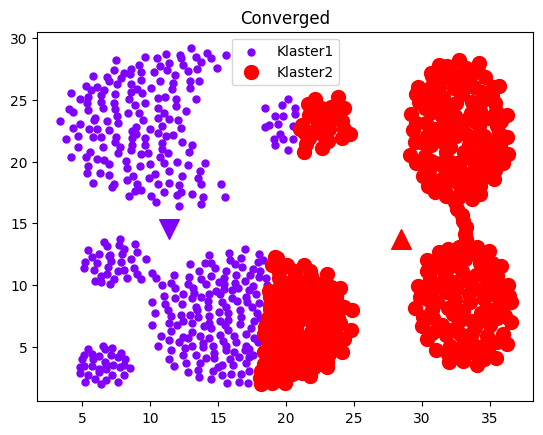

iter :  2
centroid :  [[11.41715328 14.55389294  3.37956204]
 [28.45145889 13.75517241  4.19628647]]


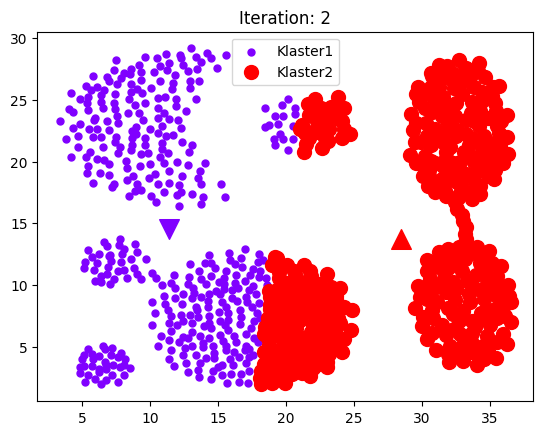

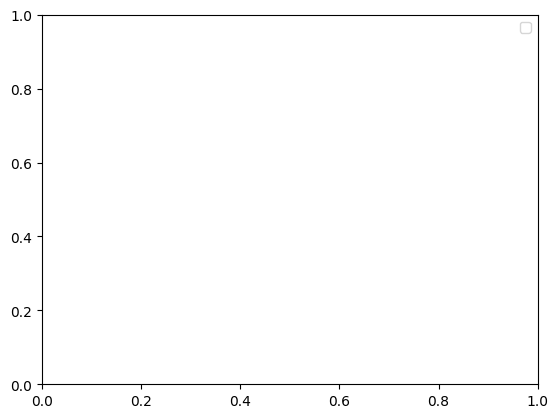

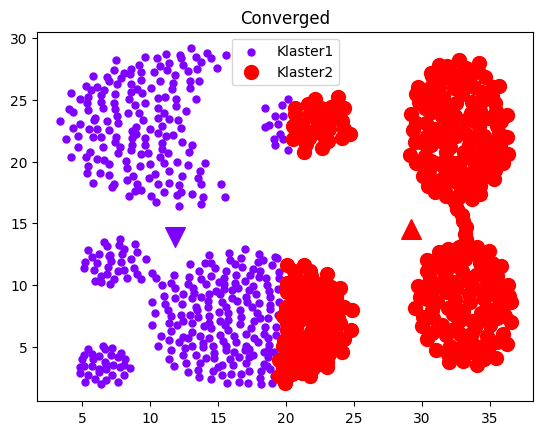

iter :  3
centroid :  [[11.86004566 13.90719178  3.44520548]
 [29.21128571 14.50285714  4.17714286]]


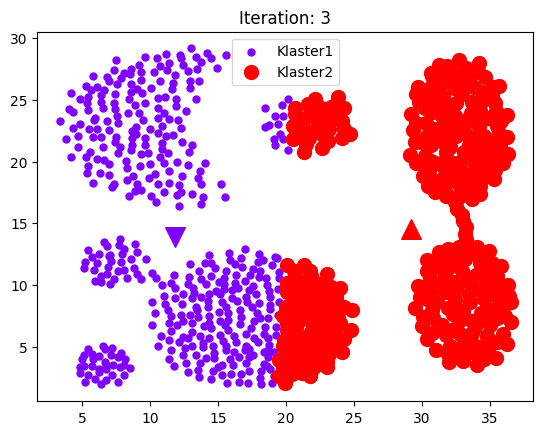

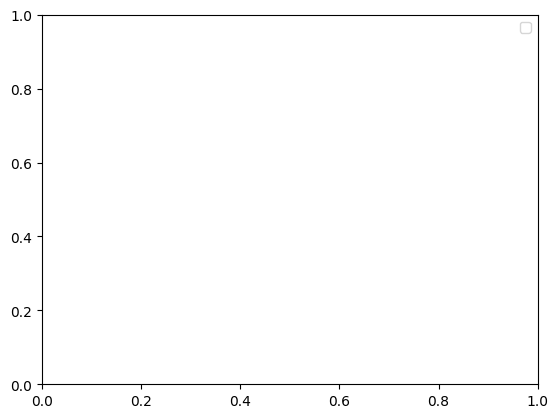

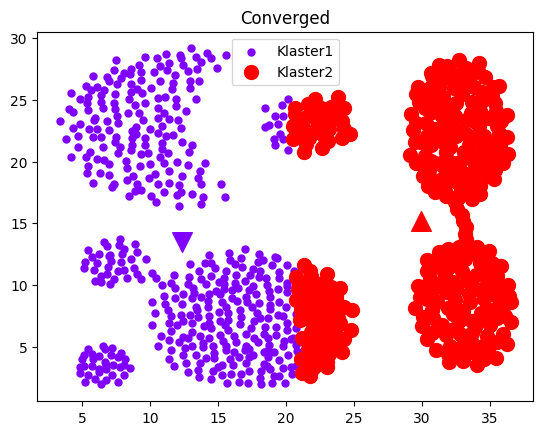

iter :  4
centroid :  [[12.32726293 13.47672414  3.4762931 ]
 [29.9345679  15.16712963  4.19135802]]


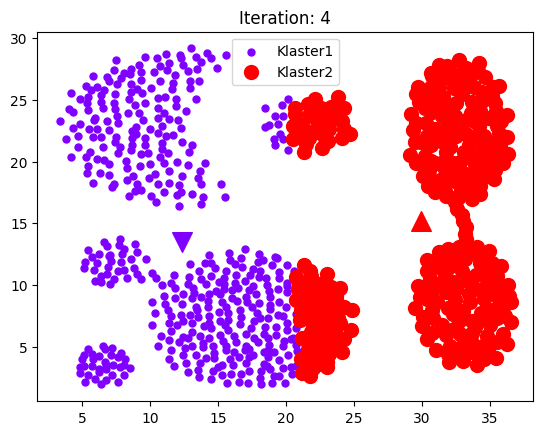

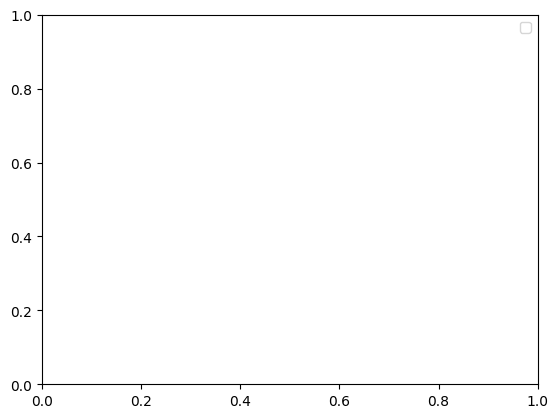

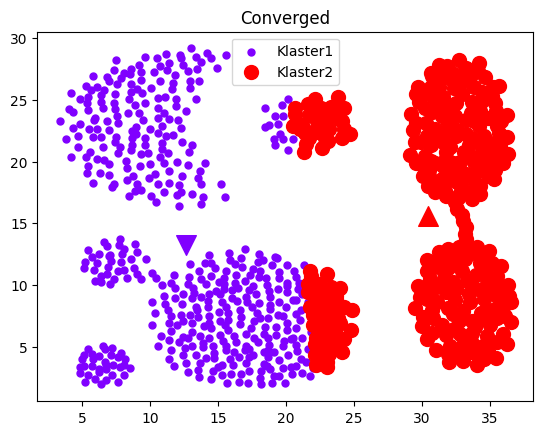

iter :  5
centroid :  [[12.65975104 13.26213693  3.48962656]
 [30.44656863 15.60457516  4.2124183 ]]


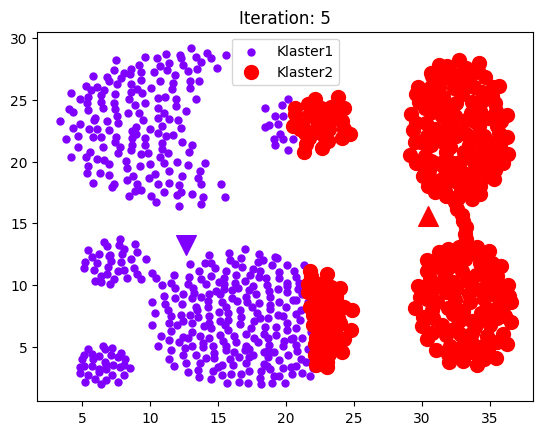

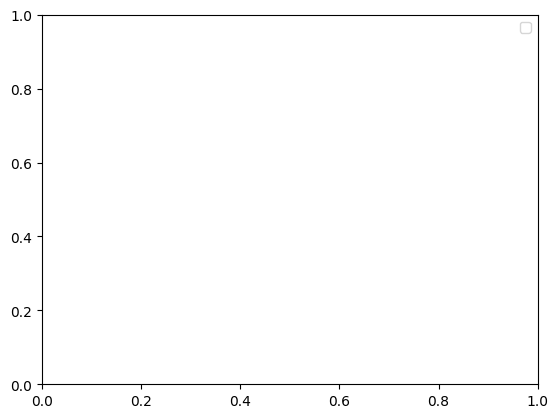

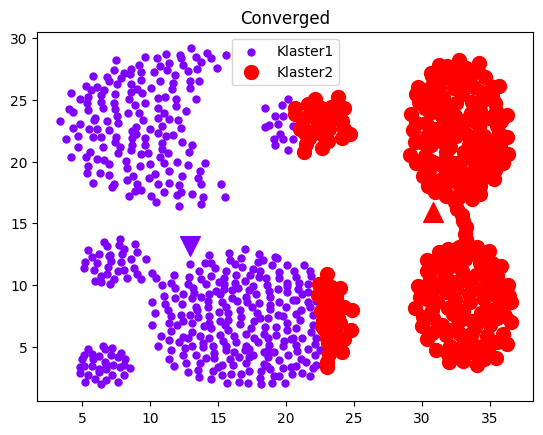

iter :  6
centroid :  [[12.92046371 13.12762097  3.49798387]
 [30.85650685 15.94537671  4.23287671]]


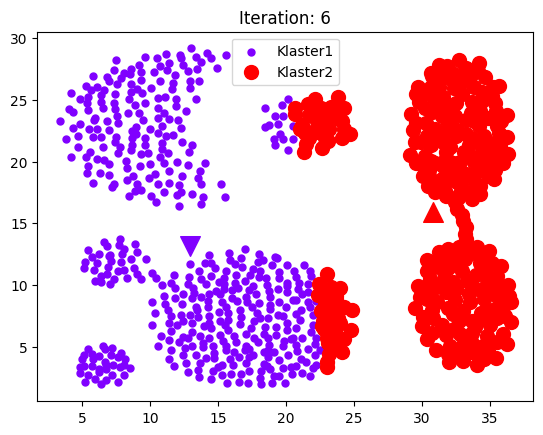

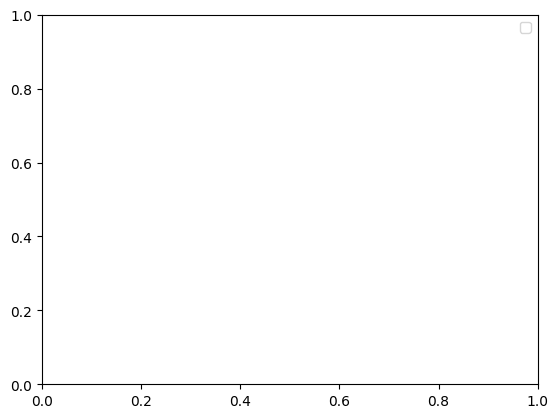

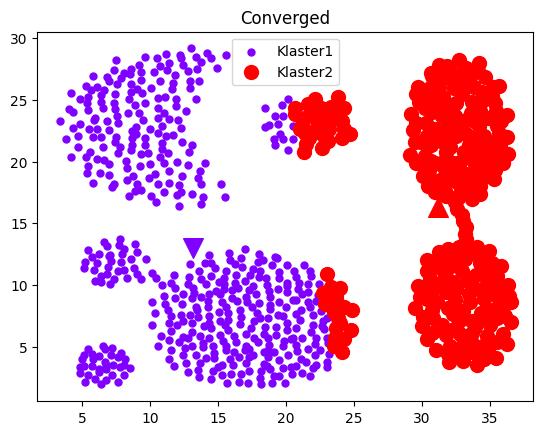

iter :  7
centroid :  [[13.15433071 12.96958661  3.50984252]
 [31.20089286 16.35285714  4.24285714]]


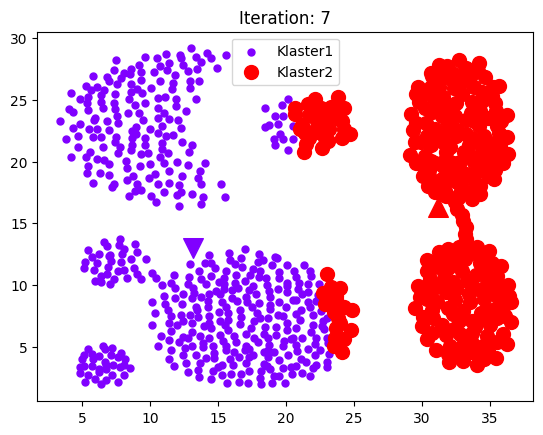

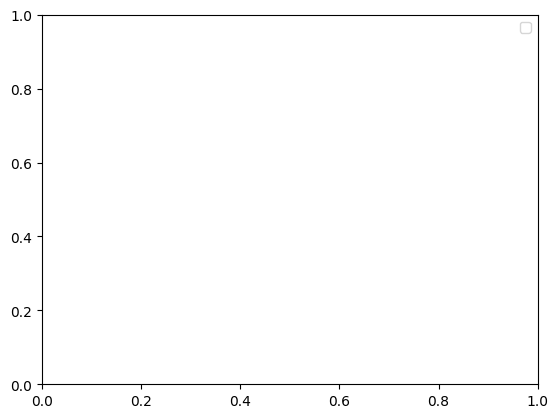

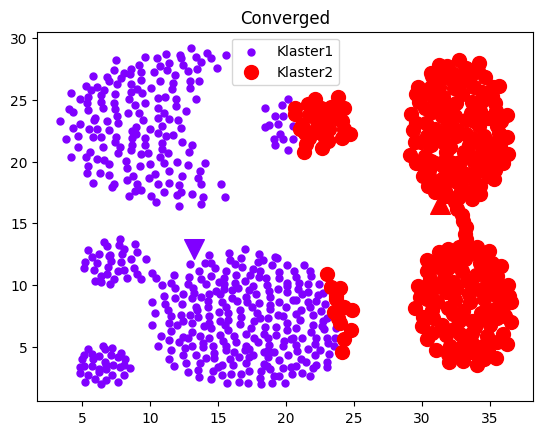

iter :  8
centroid :  [[13.25302144 12.91150097  3.51461988]
 [31.34490909 16.52272727  4.24727273]]


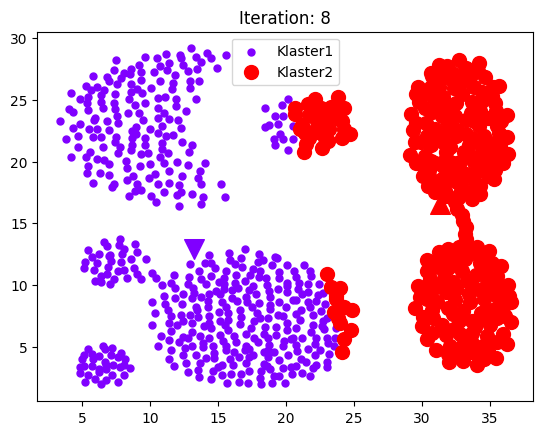

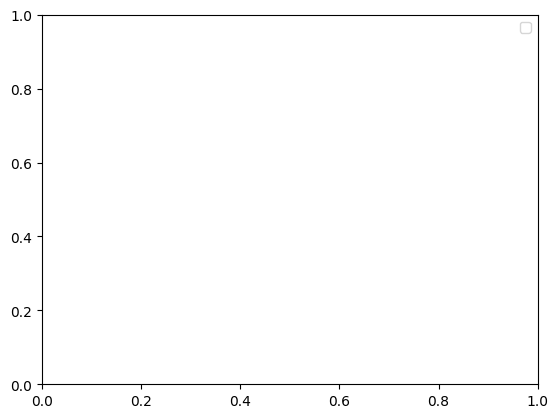

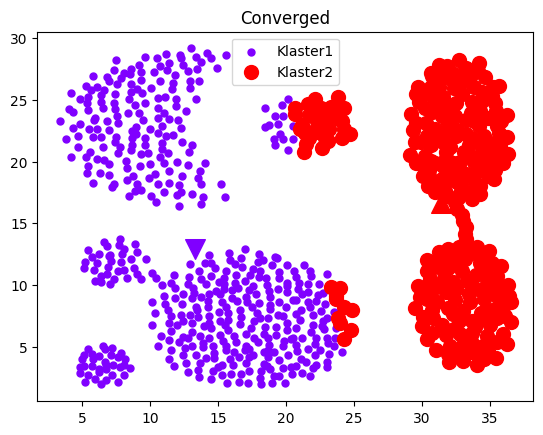

iter :  9
centroid :  [[13.3129845  12.88158915  3.51744186]
 [31.43069853 16.61930147  4.25      ]]


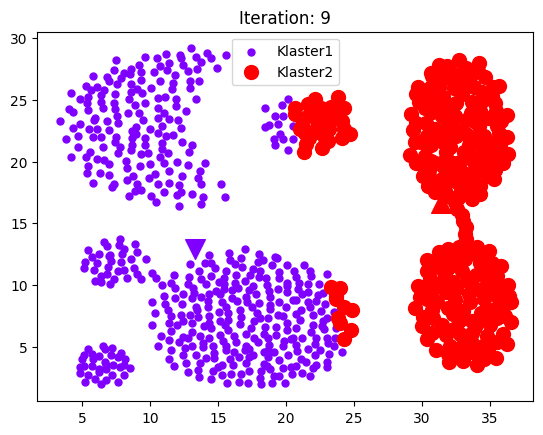

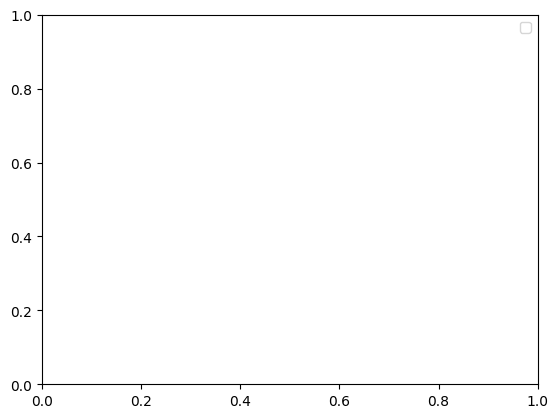

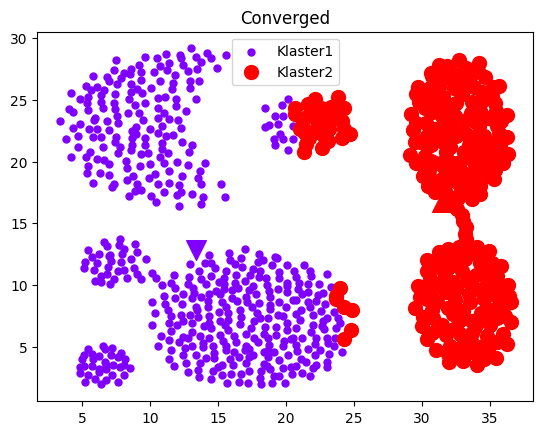

iter :  10
centroid :  [[13.37302505 12.85356455  3.52023121]
 [31.5169145  16.71505576  4.2527881 ]]


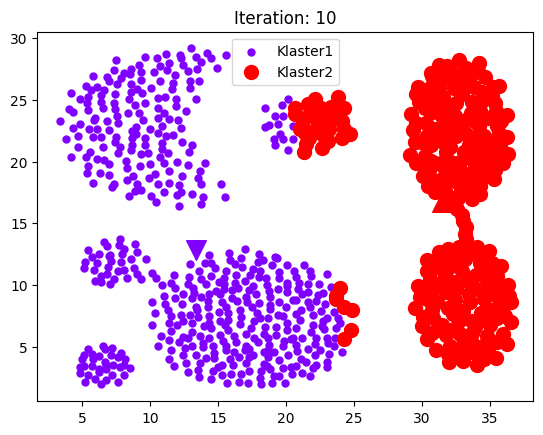

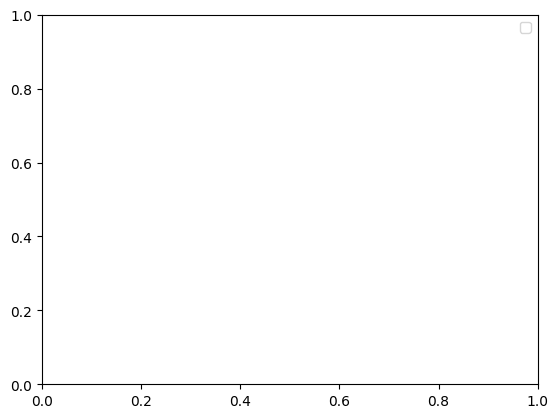

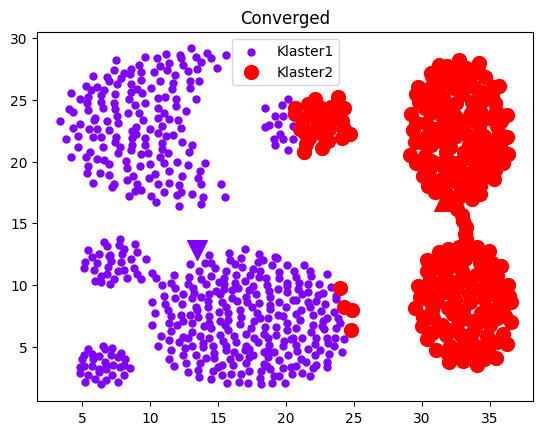

iter :  11
centroid :  [[13.43342912 12.82490421  3.52298851]
 [31.60300752 16.81484962  4.2556391 ]]


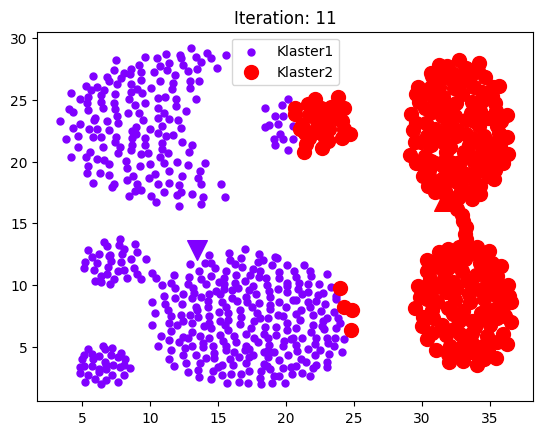

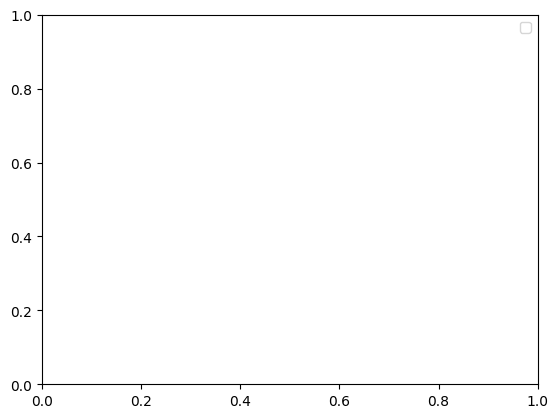

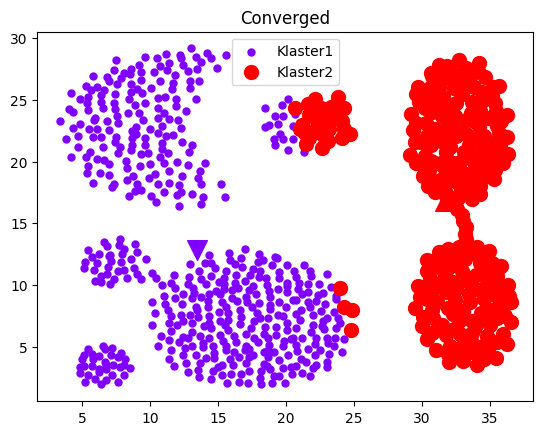

iter :  12
centroid :  [[13.46221374 12.86116412  3.51335878]
 [31.68352273 16.77310606  4.28030303]]


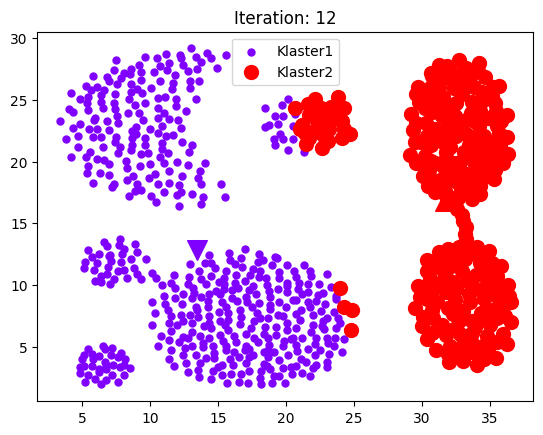

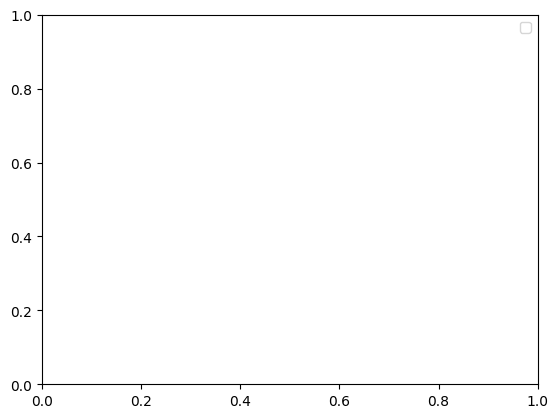

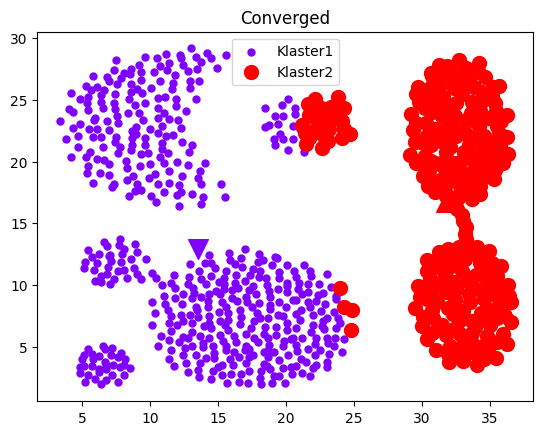

iter :  13
centroid :  [[13.49020913 12.90142586  3.50380228]
 [31.76641221 16.7221374   4.30534351]]


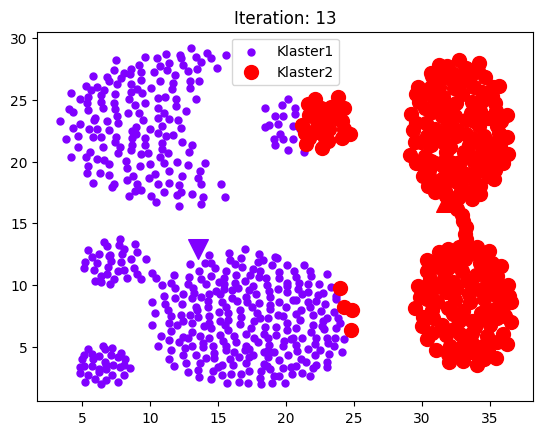

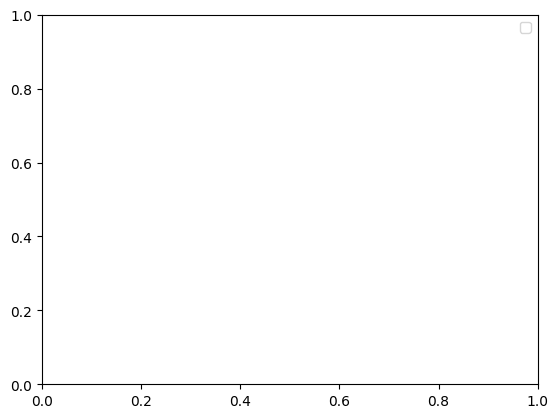

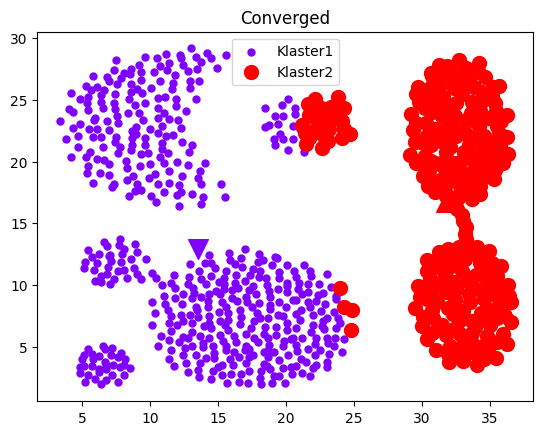

iter :  14
centroid :  [[13.49020913 12.90142586  3.50380228]
 [31.76641221 16.7221374   4.30534351]]


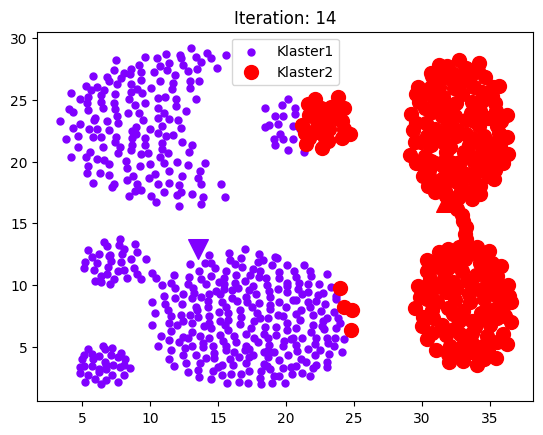

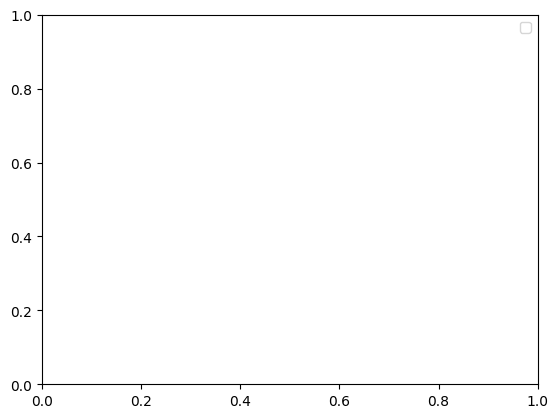

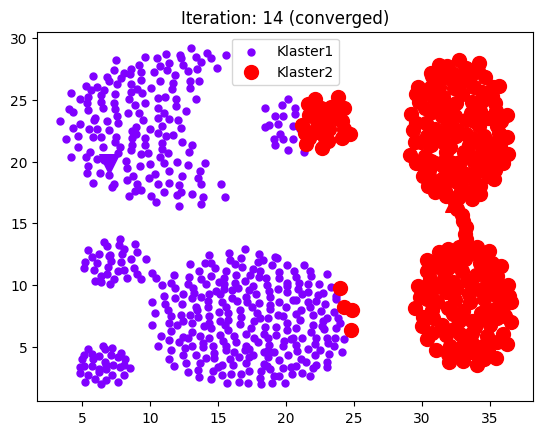

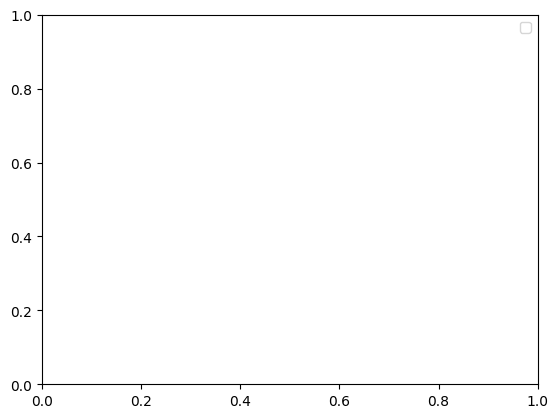

In [6]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = Kmeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter)+ " (converged)", 1)